## Import Required Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Loading and Checking the dataset

hd = pd.read_csv("heart_disease.csv")
hd.head(10)
# hd.tail(10)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes


In [43]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [44]:
hd.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [45]:
# Analyzing data

import seaborn as sns

<Axes: xlabel='AHD', ylabel='count'>

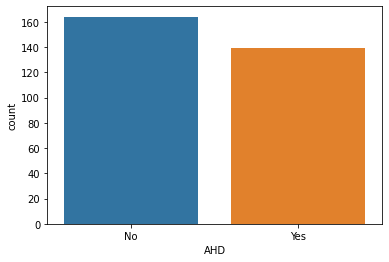

In [46]:
sns.countplot(x = 'AHD', data = hd)

- Absence of coronary artery disease is more as compare to the presence of coronary artery disease.


<Axes: xlabel='Age', ylabel='count'>

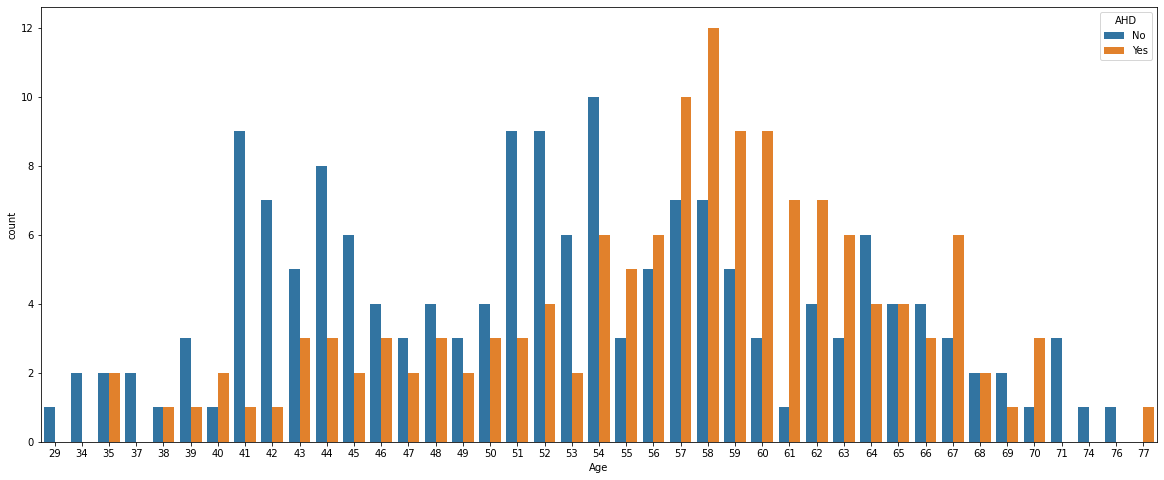

In [47]:
plt.figure(figsize=(20,8))
sns.countplot(x='Age', hue ='AHD', data=hd)

In [48]:
# Finding avg age that can have or have not the AHD.

ahd_age = hd.groupby("AHD")["Age"].mean().reset_index()
ahd_age = ahd_age.rename(columns={"Age" : "Avg_age"})
ahd_age

,AHD,Avg_age
0,No,52.585366
1,Yes,56.625899


- For individuals without coronary artery disease (AHD = 0), the average age is approximately 52.58 years.
- For individuals with coronary artery disease (AHD = 1), the average age is approximately 56.66 years.

<Axes: xlabel='AHD', ylabel='MaxHR'>

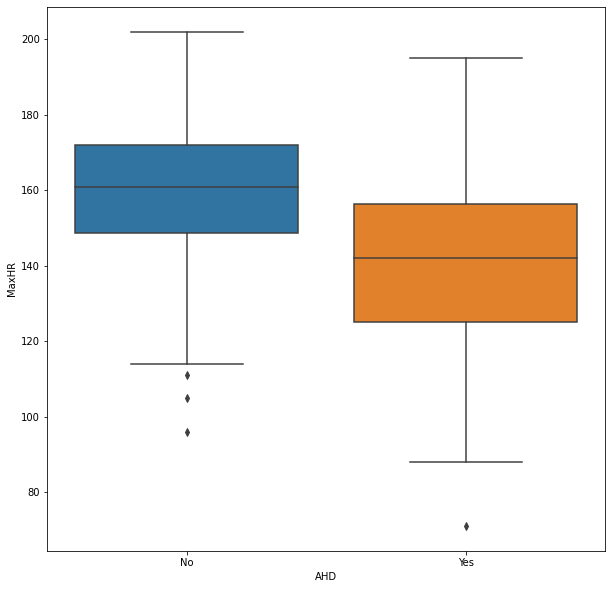

In [49]:
plt.figure(figsize=(10,10))
sns.boxplot(x='AHD', y='MaxHR', data=hd)

<Axes: xlabel='AHD', ylabel='count'>

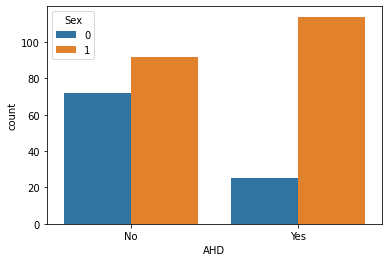

In [50]:
# Let's assume that 1=Male and 0=Female. 
sns.countplot(x='AHD', hue='Sex', data=hd)

In [51]:
hd["Sex"][(hd["AHD"] == 1) & (hd["Sex"] == 1)].count()

0

- The count of males (113) is indeed higher than the count of females (25) among individuals with coronary artery disease.
- The count of males is higher than the count of females among individuals without coronary artery disease.

<Axes: xlabel='AHD', ylabel='count'>

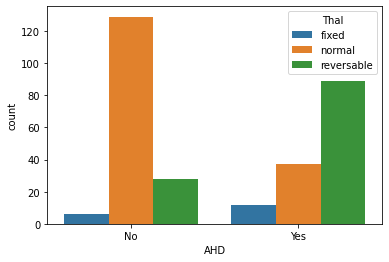

In [52]:
sns.countplot(x='AHD', hue='Thal', data=hd)

In [76]:
print('For "fixed" Thal category:\n')
print("Individuals without AHD:",hd["Age"][(hd["AHD"] == 0) & (hd["Thal"] == "fixed")].count())
print("Individuals with AHD:",hd["Age"][(hd["AHD"] == 1) & (hd["Thal"] == "fixed")].count())
print("\n")


print('For "normal" Thal category:\n')
print("Individuals without AHD:",hd["Age"][(hd["AHD"] == 0) & (hd["Thal"] == "normal")].count())
print("Individuals with AHD:",hd["Age"][(hd["AHD"] == 1) & (hd["Thal"] == "normal")].count())
print("\n")


print('For "reversable" Thal category:\n')
print("Individuals without AHD:",hd["Age"][(hd["AHD"] == 0) & (hd["Thal"] == "reversable")].count())
print("Individuals with AHD:",hd["Age"][(hd["AHD"] == 1) & (hd["Thal"] == "reversable")].count())

For "fixed" Thal category:

Individuals without AHD: 6
Individuals with AHD: 12


For "normal" Thal category:

Individuals without AHD: 129
Individuals with AHD: 37


For "reversable" Thal category:

Individuals without AHD: 28
Individuals with AHD: 89


- The pattern suggest that the "reversable" Thal category could potentially be associated with more severe cases of coronary artery disease compared to the "normal" category.

In [54]:
# Data wrangling
hd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [55]:
hd['Ca'].fillna(value=0,inplace=True)

In [56]:
hd.dropna(how='any',inplace=True)

In [57]:
hd.isnull().sum()
hd.info()
# Now we have total rows: 301

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        301 non-null    int64  
 1   Sex        301 non-null    int64  
 2   ChestPain  301 non-null    object 
 3   RestBP     301 non-null    int64  
 4   Chol       301 non-null    int64  
 5   Fbs        301 non-null    int64  
 6   RestECG    301 non-null    int64  
 7   MaxHR      301 non-null    int64  
 8   ExAng      301 non-null    int64  
 9   Oldpeak    301 non-null    float64
 10  Slope      301 non-null    int64  
 11  Ca         301 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        301 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.3+ KB


In [58]:
hd.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [59]:
# For train and test we need to give them variable.
X = hd.iloc[:,:-1].values
y = hd.iloc[:,-1].values

In [60]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()

In [61]:
# ChestPain column
X[:,2]=label_en.fit_transform(X[:,2])
# X[:,2]
# 0=asymptomatic, 1=nonanginal, 2=nontypical, 3=typical

#Thal
X[:,-1]=label_en.fit_transform(X[:,-1])
# X[:,-1]
# 0=fixed. 1=normal, 2= reversable

# AHD
y[:]=label_en.fit_transform(y[:])
# y[:]
# 0=No, 1=Yes

In [62]:
X

array([[63, 1, 3, ..., 3, 0.0, 0],
       [67, 1, 0, ..., 2, 3.0, 1],
       [67, 1, 0, ..., 2, 2.0, 2],
       ...,
       [57, 1, 0, ..., 2, 1.0, 2],
       [57, 0, 2, ..., 2, 1.0, 1],
       [38, 1, 1, ..., 1, 0.0, 1]], dtype=object)

In [63]:
y=y.astype('int')

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

In [66]:
sc = StandardScaler()
sc_train = sc.fit_transform(X_train)
sc_test = sc.transform(X_test)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
reg = LogisticRegression()

In [69]:
reg.fit(sc_train, y_train)

LogisticRegression()

In [70]:
pred = reg.predict(sc_test)

In [71]:
# Checking Accuracy

from sklearn.metrics import confusion_matrix, classification_report

In [72]:
confusion_matrix(y_test,pred)

array([[31,  3],
       [ 5, 22]], dtype=int64)

In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        34
           1       0.88      0.81      0.85        27

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [74]:
from sklearn.metrics import accuracy_score

In [75]:
print(f'Accuracy Score is {accuracy_score(y_test,pred)*100}')

Accuracy Score is 86.88524590163934


**Conclusion: Insights into Heart Disease Analysis**

In this project, we delved into an extensive heart disease dataset to uncover key insights and build predictive models. By exploring various factors such as age, gender, chest pain type, and diagnostic test results, we gained valuable understanding regarding the presence of coronary artery disease.

Our analysis yielded noteworthy observations:

- Age seems to influence the likelihood of CAD, with slightly older individuals being more susceptible.
- The "reversable" Thal category emerged as a potential risk indicator for CAD. and so on

Utilizing a logistic regression model, we predicted AHD presence with a satisfactory accuracy of 87%. This suggests that the chosen features hold promise in identifying potential cases of AHD.